In [17]:
from pylab import *
from scipy.integrate import *
%run "mis_integradores.ipynb"
%matplotlib inline

Hay que resolver: $$ \frac{d^2 \vec \rho}{d\tau^2} = -\frac{\hat \rho}{\rho^2}$$

In [2]:
def mov_planeta(x,t):
    r3 = (x[0]**2 +x[1]**2)**(1.5)
    drx = x[2]
    dry = x[3]
    dvrx = -x[0]/r3
    dvry = -x[1]/r3
    return array([drx,dry,dvrx,dvry])

# Integrador de Runge Kutta a segundo Orden

In [15]:
t,r_vr = integradorRK(mov_planeta,[1,0,0.4,0.9],[0,10])
%time

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs


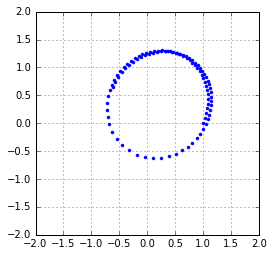

In [4]:
plot(r_vr[:,0],r_vr[:,1],".")
zoom = 2
axes().set_aspect("equal")
grid(True)
xlim(-zoom,zoom)
ylim(-zoom,zoom)
show()

# Integrador con Método de Segundo Orden

In [5]:
def j_movplaneta(x,t):
    d_ec =array([0,0,0,0])
    r5 = (x[0]**2 +x[1]**2)**(2.5)
    rxmry = ((2*x[0]*x[0])-x[1]*x[1])/r5
    rymrx = ((2*x[1]*x[1])-x[0]*x[0])/r5
    rxry = (3*x[0]*x[1])/r5
    jac = array([[0,0,1,0],[0,0,0,1],[rxmry,rxry,0,0],[rxry,rymrx,0,0]])
    return d_ec,jac

In [16]:
t2,r_vr2 = integrador(mov_planeta,j_movplaneta,[1,0,0.4,0.9],[0,10])
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


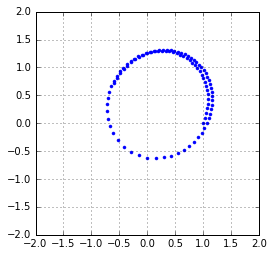

In [7]:
plot(r_vr2[:,0],r_vr2[:,1],".")
zoom = 2
axes().set_aspect("equal")
grid(True)
xlim(-zoom,zoom)
ylim(-zoom,zoom)
show()

# Integrador de Runge Kutta a cuarto orden

In [14]:
t3,r_vr3 = integradorRK4orden(mov_planeta,[1,0,0.4,0.9],[0,10])
%time

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 9.06 µs


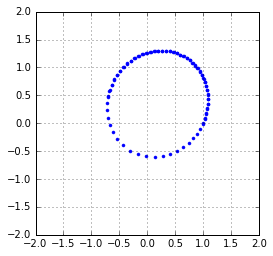

In [10]:
plot(r_vr3[:,0],r_vr3[:,1],".")
zoom = 2
axes().set_aspect("equal")
grid(True)
xlim(-zoom,zoom)
ylim(-zoom,zoom)
show()

# Usando Odeint

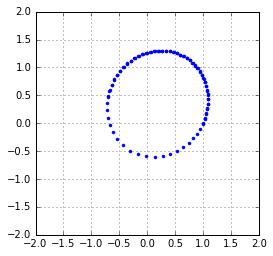

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs


In [20]:
h = 0.1
tiempos = arange(0,10+h,h)
solucion = odeint(mov_planeta,[1,0,0.4,0.9],tiempos)
plot(solucion[:,0],solucion[:,1],".")
zoom = 2
axes().set_aspect("equal")
grid(True)
xlim(-zoom,zoom)
ylim(-zoom,zoom)
show()
%time

### Comparando las soluciones

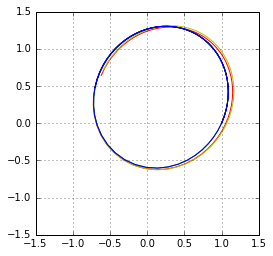

In [21]:
plot(r_vr[:,0],r_vr[:,1],"r")
plot(r_vr2[:,0],r_vr2[:,1],"y")
plot(r_vr3[:,0],r_vr3[:,1],"g")
plot(solucion[:,0],solucion[:,1],"b")
zoom = 1.5
axes().set_aspect("equal")
grid(True)
xlim(-zoom,zoom)
ylim(-zoom,zoom)
show()

### Dibujando la hodógrafa

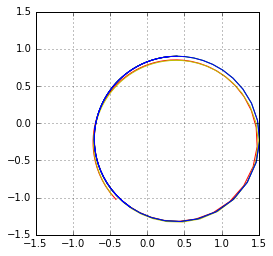

In [22]:
plot(r_vr[:,2],r_vr[:,3],"r")
plot(r_vr2[:,2],r_vr2[:,3],"y")
plot(r_vr3[:,2],r_vr3[:,3],"g")
plot(solucion[:,2],solucion[:,3],"b")
zoom = 1.5
axes().set_aspect("equal")
grid(True)
xlim(-zoom,zoom)
ylim(-zoom,zoom)
show()